# Introduction: 
The purpose of this project is to investigate how the entry of Chobani in 2007 influenced the sales of Yoplait yoghurt. We have national-level weekly data on (1) total unit sales of Yoplait products, (2) average unit price of Yoplait products, (3) average unit price of Dannon products,which is a substitute for Yoplait yoghurt, and (4) average unit price of Chobani products between 2001 and 2011. 

Our analysis includes plotting the data to observe patterns. We also estimate a linear demand curve for Yoplait. Finally, we compute weekly price elasticities of Yoplait demand (own- and two cross-price elasticities) to draw inference about competitive structure, particularly whether the price elasticities changed as a result of Chobani’s entry. 


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
df=pd.read_excel('yogurt1.xls')
df

,WEEK,MONTH,YOPLAIT UNITS,YOPLAIT PRICE,DANNON PRICE,CHOBANI PRICE,LN(WEEK),Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,1,Jan,1431790,0.76,1.04,0.00,0.000000,1,0,0,0,0,0,0,0,0,0,0
1,2,Jan,1549503,0.80,0.94,0.00,0.693147,1,0,0,0,0,0,0,0,0,0,0
2,3,Jan,1448646,0.83,1.02,0.00,1.098612,1,0,0,0,0,0,0,0,0,0,0
3,4,Jan,1398011,0.82,1.10,0.00,1.386294,1,0,0,0,0,0,0,0,0,0,0
4,5,Feb,1525899,0.81,1.10,0.00,1.609438,0,1,0,0,0,0,0,0,0,0,0
5,6,Feb,1315745,0.87,0.89,0.00,1.791759,0,1,0,0,0,0,0,0,0,0,0
6,7,Feb,1247943,0.87,1.00,0.00,1.945910,0,1,0,0,0,0,0,0,0,0,0
7,8,Feb,1206063,0.89,1.06,0.00,2.079442,0,1,0,0,0,0,0,0,0,0,0
8,9,Mar,1541804,0.85,1.11,0.00,2.197225,0,0,1,0,0,0,0,0,0,0,0
9,10,Mar,1493644,0.83,1.11,0.00,2.302585,0,0,1,0,0,0,0,0,0,0,0


### Graphical Analysis


In [2]:
df1=df.iloc[:,[0,2,3,4,5,]]
df1
A1=df1.iloc[:,[0,1]]
A2=df1.iloc[:,[0,2]]
A3=df1.iloc[:,[0,3]]
A4=df1.iloc[:,[0,4]]

<Figure size 1440x720 with 0 Axes>

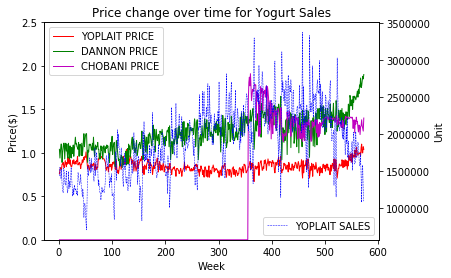

<Figure size 1440x720 with 0 Axes>

In [3]:
#fig, ax =plt.subplots()
plt.plot(A2["WEEK"],A2["YOPLAIT PRICE"],color="r",linewidth = 1)
plt.plot(A3["WEEK"],A3["DANNON PRICE"],color="g",linewidth = 1)
plt.plot(A4["WEEK"],A4["CHOBANI PRICE"],color="m",linewidth = 1)
plt.ylim(0,2.50)
plt.title("Price change over time for Yogurt Sales")
plt.ylabel("Price($)")
plt.xlabel("Week")
plt.legend(["YOPLAIT PRICE","DANNON PRICE","CHOBANI PRICE"])
plt2=plt.twinx()
plt2.plot(A1["WEEK"],A1["YOPLAIT UNITS"],color="b",linewidth = 0.5,linestyle="--")
plt2.set_ylabel("Unit")
plt2.legend(["YOPLAIT SALES"],loc=4)
plt.figure(figsize=(20,10))

#### Observations from above graph:
- 1. Yoplait sales increase until around week 400 and then fluctuate over time. After week 500,Yoplait sales starts to decrease.
- 2. Yoplait sales exhibit seasonality.
- 3. When Chobani enters the market at around week 350, it set the price higher than Yoplait's and Dannon's price. But the price then decrease immediately to around 1.2 dollars and was maintained at a similar level with fluctuation.
- 4. Yoplait’s price is relatively stable until around week 500. Then its price starts to increase.
- 5. In contrast, Dannon’s price increased to around week 400. Then its price decreased when Chobani cut off the price, and increased again more sharply after around week 500.

#### These observation could be interpreted as follows:
- 1. The decrease of Yoplait sales after week 500 might be affected by the increase of its sales price.
- 2. The decrease of Yoplait sales could also related to the Chobani’s price decrease. When Chobani entered the market, its sales price was set too high above others to compete with Yoplait and Dannon due to the customers' brand loyalty. Then the price was cutted off strategically around week 400 to attract customers that used to purchase products of Yoplait. This could be verified that at that time, Yoplait sales also started to decrease.
- 3. The sharp increase of Dannon's price is the reaction to the increase of Yoplait's price after week 500.

In [4]:
df=df.rename(columns={df.columns[2]: "YOPLAIT_UNITS",df.columns[3]: "YOPLAIT_PRICE",
                      df.columns[4]: "DANNON_PRICE",df.columns[5]: "CHOBANI_PRICE",df.columns[6]: "LNWEEK" })
df

,WEEK,MONTH,YOPLAIT_UNITS,YOPLAIT_PRICE,DANNON_PRICE,CHOBANI_PRICE,LNWEEK,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,1,Jan,1431790,0.76,1.04,0.00,0.000000,1,0,0,0,0,0,0,0,0,0,0
1,2,Jan,1549503,0.80,0.94,0.00,0.693147,1,0,0,0,0,0,0,0,0,0,0
2,3,Jan,1448646,0.83,1.02,0.00,1.098612,1,0,0,0,0,0,0,0,0,0,0
3,4,Jan,1398011,0.82,1.10,0.00,1.386294,1,0,0,0,0,0,0,0,0,0,0
4,5,Feb,1525899,0.81,1.10,0.00,1.609438,0,1,0,0,0,0,0,0,0,0,0
5,6,Feb,1315745,0.87,0.89,0.00,1.791759,0,1,0,0,0,0,0,0,0,0,0
6,7,Feb,1247943,0.87,1.00,0.00,1.945910,0,1,0,0,0,0,0,0,0,0,0
7,8,Feb,1206063,0.89,1.06,0.00,2.079442,0,1,0,0,0,0,0,0,0,0,0
8,9,Mar,1541804,0.85,1.11,0.00,2.197225,0,0,1,0,0,0,0,0,0,0,0
9,10,Mar,1493644,0.83,1.11,0.00,2.302585,0,0,1,0,0,0,0,0,0,0,0


### Demand Curve Estimation
We conduct regression analysis using the entire data and estimate a linear demand for Yoplait products. We include the following three set of variables as Independent Variables:  
(1) three prices

(2) time trend (natural log of the variable WEEK, i.e., ln(WEEK)) 

(3) monthly dummies  
 
Inclusion of three prices allows us to investigate own- and cross-price elasticities. Time trend and monthly dummies are important for capturing the variation in sales not due to price changes.

In [5]:
reg_all=smf.ols("YOPLAIT_UNITS~YOPLAIT_PRICE+DANNON_PRICE+CHOBANI_PRICE+LNWEEK+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=df).fit()
print(reg_all.summary())

                            OLS Regression Results                            
Dep. Variable:          YOPLAIT_UNITS   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     262.0
Date:                Tue, 14 May 2019   Prob (F-statistic):          8.50e-241
Time:                        14:02:56   Log-Likelihood:                -7698.2
No. Observations:                 573   AIC:                         1.543e+04
Df Residuals:                     557   BIC:                         1.550e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.126e+06   1.43e+05     28.858

In [6]:
from sklearn.linear_model import LinearRegression
y = df.iloc[:,2]
X = df.iloc[:,3:]

In [7]:
reg = LinearRegression().fit(X, y)
intercept = reg.intercept_

print('Estimated intercept coefficient:', intercept)

Estimated intercept coefficient: 4126408.170070924


In [8]:
vari = X.columns.values.tolist()
vari.insert(0, 'Intercept')
Para_Est = pd.DataFrame(list(zip(vari, reg_all.params, reg_all.bse)), columns = ['Variables', 'Estimated Coefficients', 'Standard Error'])
Para_Est

,Variables,Estimated Coefficients,Standard Error
0,Intercept,4.126408e+06,142989.818025
1,YOPLAIT_PRICE,-4.306898e+06,126539.055097
2,DANNON_PRICE,8.058438e+04,54246.841616
3,CHOBANI_PRICE,2.558855e+05,15045.131681
4,LNWEEK,1.573041e+05,10440.104876
5,Jan,4.167889e+05,37517.068886
6,Feb,4.577361e+05,36657.886979
7,Mar,4.763211e+05,35042.897995
8,Apr,4.260627e+05,35287.490489
9,May,4.200777e+05,35071.836010


#### Regression Analysis:

- The linear demand is estiamted as the format:
    
        Yoplait units sales= b0 + b1 * Yoplait Price + b2 * Dannon Price+ b3 * Chobani Price + b4 * Lnweek + … + b15 * Nov


- With the help of regression calculation tool, the estimated regression function is finally determined as:

         Yoplait units sales= 4126408 -4306898 * Yoplait Price + 80584.38 * Dannon Price + 255885.5 * Chobani Price
         + 157304.1 * LnWeek + 416788.9 * Jan + 457736.1 * Feb + 476321.1 * Mar + 426062.7 * Apr + 420077.7 * May
         + 363990.5 * Jun + 343386.6 * Jul + 406551.8 * Aug + 453551.1 * Sep + 349466.7 * Oct + 139042.3 * Nov
            
- The results seem to be consistent with theory: The Yoplait price has a negative effect on Yoplait's sales, while the price of Dannon and Chobani has a positive effect on Yoplait's sales. The time also influence the sales positively. All the coefficients except Dannon Price are significant. The adjusted R squared value is pretty high at 87%, indicating high goodness of fit.

In [9]:
Month = Para_Est.iloc[5:16,0:2]
Month.columns = ['MONTH','Monthly Dummy Effects']
Month.loc[-1] = ['Dec',0]
Month

,MONTH,Monthly Dummy Effects
5,Jan,416788.905078
6,Feb,457736.148745
7,Mar,476321.069384
8,Apr,426062.711488
9,May,420077.724684
10,Jun,363990.520966
11,Jul,343386.604344
12,Aug,406551.827621
13,Sep,453551.117530
14,Oct,349466.722548


In [10]:
newdf = df.merge(Month,on='MONTH',how='left')
newdf
#Add 'Monthly Dummy Effects'

,WEEK,MONTH,YOPLAIT_UNITS,YOPLAIT_PRICE,DANNON_PRICE,CHOBANI_PRICE,LNWEEK,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Monthly Dummy Effects
0,1,Jan,1431790,0.76,1.04,0.00,0.000000,1,0,0,0,0,0,0,0,0,0,0,416788.905078
1,2,Jan,1549503,0.80,0.94,0.00,0.693147,1,0,0,0,0,0,0,0,0,0,0,416788.905078
2,3,Jan,1448646,0.83,1.02,0.00,1.098612,1,0,0,0,0,0,0,0,0,0,0,416788.905078
3,4,Jan,1398011,0.82,1.10,0.00,1.386294,1,0,0,0,0,0,0,0,0,0,0,416788.905078
4,5,Feb,1525899,0.81,1.10,0.00,1.609438,0,1,0,0,0,0,0,0,0,0,0,457736.148745
5,6,Feb,1315745,0.87,0.89,0.00,1.791759,0,1,0,0,0,0,0,0,0,0,0,457736.148745
6,7,Feb,1247943,0.87,1.00,0.00,1.945910,0,1,0,0,0,0,0,0,0,0,0,457736.148745
7,8,Feb,1206063,0.89,1.06,0.00,2.079442,0,1,0,0,0,0,0,0,0,0,0,457736.148745
8,9,Mar,1541804,0.85,1.11,0.00,2.197225,0,0,1,0,0,0,0,0,0,0,0,476321.069384
9,10,Mar,1493644,0.83,1.11,0.00,2.302585,0,0,1,0,0,0,0,0,0,0,0,476321.069384


In [11]:
newdf['PREDICTED YOPLAIT UNITS'] = newdf['Monthly Dummy Effects'] + intercept + Para_Est.iloc[1,1] * newdf[
    'YOPLAIT_PRICE'] + Para_Est.iloc[2,1] * newdf['DANNON_PRICE'] + Para_Est.iloc[3,1] *newdf[
    'CHOBANI_PRICE'] + Para_Est.iloc[4,1] * newdf['LNWEEK']
newdf
#Add 'PREDICTED YOPLAIT UNITS'

,WEEK,MONTH,YOPLAIT_UNITS,YOPLAIT_PRICE,DANNON_PRICE,CHOBANI_PRICE,LNWEEK,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Monthly Dummy Effects,PREDICTED YOPLAIT UNITS
0,1,Jan,1431790,0.76,1.04,0.00,0.000000,1,0,0,0,0,0,0,0,0,0,0,416788.905078,1.353762e+06
1,2,Jan,1549503,0.80,0.94,0.00,0.693147,1,0,0,0,0,0,0,0,0,0,0,416788.905078,1.282463e+06
2,3,Jan,1448646,0.83,1.02,0.00,1.098612,1,0,0,0,0,0,0,0,0,0,0,416788.905078,1.223484e+06
3,4,Jan,1398011,0.82,1.10,0.00,1.386294,1,0,0,0,0,0,0,0,0,0,0,416788.905078,1.318253e+06
4,5,Feb,1525899,0.81,1.10,0.00,1.609438,0,1,0,0,0,0,0,0,0,0,0,457736.148745,1.437371e+06
5,6,Feb,1315745,0.87,0.89,0.00,1.791759,0,1,0,0,0,0,0,0,0,0,0,457736.148745,1.190714e+06
6,7,Feb,1247943,0.87,1.00,0.00,1.945910,0,1,0,0,0,0,0,0,0,0,0,457736.148745,1.223827e+06
7,8,Feb,1206063,0.89,1.06,0.00,2.079442,0,1,0,0,0,0,0,0,0,0,0,457736.148745,1.163529e+06
8,9,Mar,1541804,0.85,1.11,0.00,2.197225,0,0,1,0,0,0,0,0,0,0,0,476321.069384,1.376947e+06
9,10,Mar,1493644,0.83,1.11,0.00,2.302585,0,0,1,0,0,0,0,0,0,0,0,476321.069384,1.479659e+06


In [12]:
Residual = newdf["YOPLAIT_UNITS"] - newdf["PREDICTED YOPLAIT UNITS"]
res_df = 557 #Based on the regression results
RSE= np.sqrt(np.sum(Residual ** 2/res_df))
RSE #Residual Standard Error

167734.90963009506

In [13]:
newdf['95PI_L'] = newdf['PREDICTED YOPLAIT UNITS'] - 2 * RSE
newdf['95PI_U'] = newdf['PREDICTED YOPLAIT UNITS'] + 2 * RSE
newdf['MAPE'] = abs(newdf['PREDICTED YOPLAIT UNITS'] - newdf['YOPLAIT_UNITS'])/newdf['YOPLAIT_UNITS']
print("The the average Mean Absolute Percentage Error across 573 weeks was: {}".format(newdf['MAPE'].mean()))

The the average Mean Absolute Percentage Error across 573 weeks was: 0.07259078870634533


In [14]:
newdf1=newdf.iloc[:,[0,2,-2,-3,-4]]
B1=newdf1.iloc[:,[0,1]]
B2=newdf1.iloc[:,[0,2]]
B3=newdf1.iloc[:,[0,3]]
B4=newdf1.iloc[:,[0,4]]

<Figure size 1440x720 with 0 Axes>

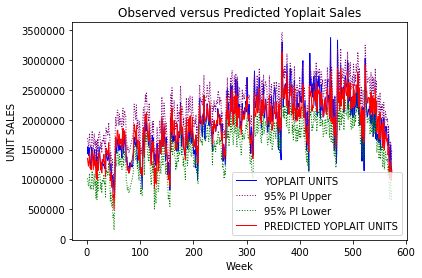

<Figure size 1440x720 with 0 Axes>

In [15]:
plt.plot(B1["WEEK"],B1["YOPLAIT_UNITS"],color="b",linewidth = 1)
plt.plot(B2["WEEK"],B2["95PI_U"],color="purple",linewidth = 1,linestyle=':')
plt.plot(B3["WEEK"],B3["95PI_L"],color="g",linewidth = 1,linestyle=':')
plt.plot(B4["WEEK"],B4["PREDICTED YOPLAIT UNITS"],color="r",linewidth = 1)
plt.title("Observed versus Predicted Yoplait Sales")
plt.ylabel("UNIT SALES")
plt.xlabel("Week")
plt.legend(["YOPLAIT UNITS","95% PI Upper","95% PI Lower","PREDICTED YOPLAIT UNITS"])
plt.figure(figsize=(20,10))

#### Graphical Analysis and MAPE calculation:

- 1.Using the estimated demand and the observed IVs (prices, ln(week), and within-year week index dummies), we predict Yoplait sales for each of the 573 weeks. We then plot it with the observed Yoplait sales (YOPLAIT UNITS) and the 95% PI upper and 95% PI lower interval.

- 2.It can be observed from the graph that the predicted sales explain the observed data pattern pretty well, except for extremely high or low observed values. We compute the Mean Absolute Percentage Error (MAPE) for each week, and then compute the average MAPE across 573 weeks. It was 7.26%, which is quite low.

Thus with confidence, we can use the estimated linear demand for the following analysis on price elasticities.


### Change in Price Elasticities due to Chobani Entry
We use the weekly price elasticities and compute pre- and post-Chobani average own- and cross-price elasticities. 

In [16]:
newdf

,WEEK,MONTH,YOPLAIT_UNITS,YOPLAIT_PRICE,DANNON_PRICE,CHOBANI_PRICE,LNWEEK,Jan,Feb,Mar,...,Jul,Aug,Sep,Oct,Nov,Monthly Dummy Effects,PREDICTED YOPLAIT UNITS,95PI_L,95PI_U,MAPE
0,1,Jan,1431790,0.76,1.04,0.00,0.000000,1,0,0,...,0,0,0,0,0,416788.905078,1.353762e+06,1.018292e+06,1.689232e+06,0.054497
1,2,Jan,1549503,0.80,0.94,0.00,0.693147,1,0,0,...,0,0,0,0,0,416788.905078,1.282463e+06,9.469929e+05,1.617933e+06,0.172339
2,3,Jan,1448646,0.83,1.02,0.00,1.098612,1,0,0,...,0,0,0,0,0,416788.905078,1.223484e+06,8.880141e+05,1.558954e+06,0.155429
3,4,Jan,1398011,0.82,1.10,0.00,1.386294,1,0,0,...,0,0,0,0,0,416788.905078,1.318253e+06,9.827834e+05,1.653723e+06,0.057051
4,5,Feb,1525899,0.81,1.10,0.00,1.609438,0,1,0,...,0,0,0,0,0,457736.148745,1.437371e+06,1.101901e+06,1.772841e+06,0.058017
5,6,Feb,1315745,0.87,0.89,0.00,1.791759,0,1,0,...,0,0,0,0,0,457736.148745,1.190714e+06,8.552444e+05,1.526184e+06,0.095027
6,7,Feb,1247943,0.87,1.00,0.00,1.945910,0,1,0,...,0,0,0,0,0,457736.148745,1.223827e+06,8.883572e+05,1.559297e+06,0.019325
7,8,Feb,1206063,0.89,1.06,0.00,2.079442,0,1,0,...,0,0,0,0,0,457736.148745,1.163529e+06,8.280593e+05,1.498999e+06,0.035267
8,9,Mar,1541804,0.85,1.11,0.00,2.197225,0,0,1,...,0,0,0,0,0,476321.069384,1.376947e+06,1.041477e+06,1.712417e+06,0.106925
9,10,Mar,1493644,0.83,1.11,0.00,2.302585,0,0,1,...,0,0,0,0,0,476321.069384,1.479659e+06,1.144189e+06,1.815128e+06,0.009363


In [17]:
newdf["Own_elasticity"]= Para_Est.iloc[1,1] * newdf["YOPLAIT_PRICE"]/ newdf["PREDICTED YOPLAIT UNITS"]
newdf["Cross_elasticity($Dannon)"]= Para_Est.iloc[2,1]* newdf["DANNON_PRICE"]/newdf["PREDICTED YOPLAIT UNITS"]
newdf["Cross_elasticity($Chobani)"]= Para_Est.iloc[3,1]* newdf["CHOBANI_PRICE"]/newdf["PREDICTED YOPLAIT UNITS"]
newdf

,WEEK,MONTH,YOPLAIT_UNITS,YOPLAIT_PRICE,DANNON_PRICE,CHOBANI_PRICE,LNWEEK,Jan,Feb,Mar,...,Oct,Nov,Monthly Dummy Effects,PREDICTED YOPLAIT UNITS,95PI_L,95PI_U,MAPE,Own_elasticity,Cross_elasticity($Dannon),Cross_elasticity($Chobani)
0,1,Jan,1431790,0.76,1.04,0.00,0.000000,1,0,0,...,0,0,416788.905078,1.353762e+06,1.018292e+06,1.689232e+06,0.054497,-2.417886,0.061907,0.000000
1,2,Jan,1549503,0.80,0.94,0.00,0.693147,1,0,0,...,0,0,416788.905078,1.282463e+06,9.469929e+05,1.617933e+06,0.172339,-2.686642,0.059066,0.000000
2,3,Jan,1448646,0.83,1.02,0.00,1.098612,1,0,0,...,0,0,416788.905078,1.223484e+06,8.880141e+05,1.558954e+06,0.155429,-2.921759,0.067182,0.000000
3,4,Jan,1398011,0.82,1.10,0.00,1.386294,1,0,0,...,0,0,416788.905078,1.318253e+06,9.827834e+05,1.653723e+06,0.057051,-2.679043,0.067243,0.000000
4,5,Feb,1525899,0.81,1.10,0.00,1.609438,0,1,0,...,0,0,457736.148745,1.437371e+06,1.101901e+06,1.772841e+06,0.058017,-2.427062,0.061670,0.000000
5,6,Feb,1315745,0.87,0.89,0.00,1.791759,0,1,0,...,0,0,457736.148745,1.190714e+06,8.552444e+05,1.526184e+06,0.095027,-3.146852,0.060233,0.000000
6,7,Feb,1247943,0.87,1.00,0.00,1.945910,0,1,0,...,0,0,457736.148745,1.223827e+06,8.883572e+05,1.559297e+06,0.019325,-3.061708,0.065846,0.000000
7,8,Feb,1206063,0.89,1.06,0.00,2.079442,0,1,0,...,0,0,457736.148745,1.163529e+06,8.280593e+05,1.498999e+06,0.035267,-3.294408,0.073414,0.000000
8,9,Mar,1541804,0.85,1.11,0.00,2.197225,0,0,1,...,0,0,476321.069384,1.376947e+06,1.041477e+06,1.712417e+06,0.106925,-2.658682,0.064962,0.000000
9,10,Mar,1493644,0.83,1.11,0.00,2.302585,0,0,1,...,0,0,476321.069384,1.479659e+06,1.144189e+06,1.815128e+06,0.009363,-2.415912,0.060452,0.000000


In [18]:
C1=newdf.iloc[0:355,:]
C1

,WEEK,MONTH,YOPLAIT_UNITS,YOPLAIT_PRICE,DANNON_PRICE,CHOBANI_PRICE,LNWEEK,Jan,Feb,Mar,...,Oct,Nov,Monthly Dummy Effects,PREDICTED YOPLAIT UNITS,95PI_L,95PI_U,MAPE,Own_elasticity,Cross_elasticity($Dannon),Cross_elasticity($Chobani)
0,1,Jan,1431790,0.76,1.04,0.0,0.000000,1,0,0,...,0,0,416788.905078,1.353762e+06,1.018292e+06,1.689232e+06,0.054497,-2.417886,0.061907,0.0
1,2,Jan,1549503,0.80,0.94,0.0,0.693147,1,0,0,...,0,0,416788.905078,1.282463e+06,9.469929e+05,1.617933e+06,0.172339,-2.686642,0.059066,0.0
2,3,Jan,1448646,0.83,1.02,0.0,1.098612,1,0,0,...,0,0,416788.905078,1.223484e+06,8.880141e+05,1.558954e+06,0.155429,-2.921759,0.067182,0.0
3,4,Jan,1398011,0.82,1.10,0.0,1.386294,1,0,0,...,0,0,416788.905078,1.318253e+06,9.827834e+05,1.653723e+06,0.057051,-2.679043,0.067243,0.0
4,5,Feb,1525899,0.81,1.10,0.0,1.609438,0,1,0,...,0,0,457736.148745,1.437371e+06,1.101901e+06,1.772841e+06,0.058017,-2.427062,0.061670,0.0
5,6,Feb,1315745,0.87,0.89,0.0,1.791759,0,1,0,...,0,0,457736.148745,1.190714e+06,8.552444e+05,1.526184e+06,0.095027,-3.146852,0.060233,0.0
6,7,Feb,1247943,0.87,1.00,0.0,1.945910,0,1,0,...,0,0,457736.148745,1.223827e+06,8.883572e+05,1.559297e+06,0.019325,-3.061708,0.065846,0.0
7,8,Feb,1206063,0.89,1.06,0.0,2.079442,0,1,0,...,0,0,457736.148745,1.163529e+06,8.280593e+05,1.498999e+06,0.035267,-3.294408,0.073414,0.0
8,9,Mar,1541804,0.85,1.11,0.0,2.197225,0,0,1,...,0,0,476321.069384,1.376947e+06,1.041477e+06,1.712417e+06,0.106925,-2.658682,0.064962,0.0
9,10,Mar,1493644,0.83,1.11,0.0,2.302585,0,0,1,...,0,0,476321.069384,1.479659e+06,1.144189e+06,1.815128e+06,0.009363,-2.415912,0.060452,0.0


In [19]:
C1["Own_elasticity"].mean()

-2.2836216791501704

In [20]:
C1["Cross_elasticity($Dannon)"].mean()

0.05614998038497148

In [21]:
C2= newdf.iloc[355:,:]
C2

,WEEK,MONTH,YOPLAIT_UNITS,YOPLAIT_PRICE,DANNON_PRICE,CHOBANI_PRICE,LNWEEK,Jan,Feb,Mar,...,Oct,Nov,Monthly Dummy Effects,PREDICTED YOPLAIT UNITS,95PI_L,95PI_U,MAPE,Own_elasticity,Cross_elasticity($Dannon),Cross_elasticity($Chobani)
355,356,Oct,2043922,0.84,1.39,1.59,5.874931,0,0,0,...,1,0,349466.722548,2.301102e+06,1.965632e+06,2.636571e+06,0.125827,-1.572201,0.048678,0.176810
356,357,Nov,2124336,0.83,1.34,1.81,5.877736,0,0,0,...,0,1,139042.340772,2.186453e+06,1.850983e+06,2.521923e+06,0.029241,-1.634943,0.049387,0.211828
357,358,Nov,1920303,0.87,1.38,1.87,5.880533,0,0,0,...,0,1,139042.340772,2.033194e+06,1.697724e+06,2.368664e+06,0.058788,-1.842914,0.054695,0.235347
358,359,Nov,1792904,0.90,1.37,1.77,5.883322,0,0,0,...,0,1,139042.340772,1.878031e+06,1.542561e+06,2.213501e+06,0.047480,-2.063975,0.058785,0.241166
359,360,Nov,1504751,0.90,1.49,1.91,5.886104,0,0,0,...,0,1,139042.340772,1.923963e+06,1.588493e+06,2.259433e+06,0.278592,-2.014700,0.062408,0.254028
360,361,Nov,2170956,0.81,1.36,1.77,5.888878,0,0,0,...,0,1,139042.340772,2.265720e+06,1.930250e+06,2.601190e+06,0.043651,-1.539726,0.048371,0.199900
361,362,Dec,1882789,0.88,1.40,1.60,5.891644,0,0,0,...,0,0,0.000000,1.785353e+06,1.449883e+06,2.120823e+06,0.051751,-2.122869,0.063191,0.229320
362,363,Dec,2031723,0.83,1.43,1.66,5.894403,0,0,0,...,0,0,0.000000,2.018902e+06,1.683433e+06,2.354372e+06,0.006310,-1.770628,0.057078,0.210396
363,364,Dec,1497527,0.88,1.50,1.73,5.897154,0,0,0,...,0,0,0.000000,1.827543e+06,1.492073e+06,2.163013e+06,0.220374,-2.073861,0.066142,0.242228
364,365,Dec,1329942,0.87,1.51,1.71,5.899897,0,0,0,...,0,0,0.000000,1.866732e+06,1.531262e+06,2.202202e+06,0.403619,-2.007252,0.065185,0.234401


In [22]:
C2["Own_elasticity"].mean()

-1.7857630542663008

In [23]:
C2["Cross_elasticity($Dannon)"].mean()

0.05453197144187152

In [24]:
C2["Cross_elasticity($Chobani)"].mean()

0.16950989547367418

In [25]:
D1=pd.DataFrame({'Before Chobani entry: %∆ in unit sales of YOPLAIT':[-2.284,0.056,"N/A"],
                  'After Chobani entry: %∆ in unit sales of YOPLAIT':[-1.786,0.055,0.170],
                  'Price change':["1%_change_$YOPLAIT", "1%_change_$DANNON", "1%_change_$CHOBANI"]},
                  index=[1,2,3])
D1=D1.set_index('Price change')
D1

,Before Chobani entry: %∆ in unit sales of YOPLAIT,After Chobani entry: %∆ in unit sales of YOPLAIT
Price change,,
1%_change_$YOPLAIT,-2.284,-1.786
1%_change_$DANNON,0.056,0.055
1%_change_$CHOBANI,N/A,0.170


- Then to illustrate the effect of Chobani's entry, the price elasticities are calculated to see whether the Chobani's entry will affect the elasticities. Three price-related elasticities can be calculated using the formulas:
         Own_elasticity = b1 * Yoplait Price/ predict sales
         Cross_elasticity(Dannon) = b2 * Dannon Price/ predict sales
         Cross_elasticity(Dannon) = b3 * Chobani Price/ predict sales
           *The predict sales are obtained by taking independent variables into the estimated linear regression function.
   
-  To compare the elasticities change after Chobani's entry, we firstly take the average of the weekly price elasticity between week 1 and week 355 for "Before Chobani entry", and take the average of the weekly price elasticity between week 356 and 753 for "After Chobani entry".

#### Comparing the change in elasticities, it can be observed that:
- 1.There is a decrease in Yoplait own-price elasticity after Chobani’s entry, which means customers became less sensitive to Yoplait price.
- 2.On the other hand, the cross-price elasticity with respect to Dannon’s price remained the same after Chobani’s entry. It suggests that Chobani's entry did not significantly affect the substitutability of Yoplait for Dannon. 
- 3.The comparison between the two cross-price elasticities values (Dannon v/s Chobani) indicates that Yoplait serves as a better substitute for Chobani than for Dannon (0.170 v/s 0.055). 
- 4.The decrease of own-price elasticity of Yoplait price can be explained based on our previous interpretation: among the original Yoplait consumers, some consumers switched to Chobani after its entry. This is likely because Yoplait and Chobani are better substitutes. Now, the remaining consumers are relatively more loyal Yoplait consumers (that’s why they didn’t switch). This could be the reasoning behind why the Yoplait demand is less elastic than it was before Chobani's entry.
- 5.Since remaining Yoplait consumers post-Chobani are more loyal than those pre-Chobani, it is likely that we can charge a higher price for Yoplait post-Chobani than that pre-Chobani. This might lead to margin improvement even though Yoplait lost some consumers to Chobani.